# DS4400 Final Project
### Instructor: Ehsan Elhamifar
### Team member: Junhao Lin, Minghua Zhang, Mengting Tang

## Data Representation

In [1]:
#Import libraries
#Reading the data, using pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from torch.utils.data import Dataset

# Create a dataset class preparing for NN 
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
    
  def __len__(self):
    return self.length

In [3]:
names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']
data = pd.read_csv("drug_consumption.data",header = None, names = names)

In [4]:
#set the 'ID' as the index of the data 
data.set_index('ID', inplace = True)
data.tail(10)

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1879,-0.95197,-0.48246,-0.61113,-0.57009,0.12600,-0.05188,-1.76250,0.58331,-0.76096,-0.14277,...,CL5,CL0,CL0,CL2,CL4,CL0,CL4,CL6,CL0,CL2
1880,-0.07854,-0.48246,-0.61113,0.24923,0.11440,-0.14882,-0.57545,1.43533,-0.91699,-0.78155,...,CL3,CL0,CL3,CL5,CL3,CL0,CL4,CL2,CL0,CL2
1881,-0.95197,-0.48246,-1.43719,-0.57009,-0.31685,1.49158,-1.92173,-0.58331,-1.77200,0.58489,...,CL2,CL5,CL0,CL2,CL0,CL6,CL0,CL6,CL0,CL2
1882,-0.95197,-0.48246,0.45468,0.24923,-0.31685,-0.05188,-1.76250,0.88309,-0.76096,2.33337,...,CL0,CL0,CL0,CL2,CL0,CL0,CL2,CL2,CL0,CL0
1883,-0.95197,-0.48246,-0.61113,-0.28519,-0.31685,-0.79151,0.32197,0.29338,-0.30172,-0.27607,...,CL5,CL2,CL0,CL4,CL5,CL4,CL0,CL6,CL0,CL1
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


## Data Pre-processing & Decoding 
### The age, gender, education, country, and ethnicity columns in the data have been encoded when we extracted them.
### In order to put them in use, we have to decode them according to the information provided by the orginal dataset. 

In [5]:
#We also need to convert the digits of these values into five decimal places since the orginal ones' is float64 
#If we kept float64, the comparsion would not work 

for term in ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism',
       'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation_seeking']:
    for value in data[term]:
        value = '{:.5f}'.format(value)



In [6]:
#decoding the age 

def decodeAge(age) -> int:
    """We need to convert age into reasonable and intuitive catagories:
        - 0: 18-24
        - 1: 25-34
        - 2: 35-44
        - 3: 45-54
        - 4: 55-64
        - 5: 65+
    """
    if (age == -0.95197):
        age = 0
    elif (age == -0.07854):
        age = 1
    elif (age == 0.49788):
        age = 2
    elif (age == 1.09449):
        age = 3
    elif (age == 1.82213):
        age = 4
    elif (age == 2.59171):
        age = 5
    return age

data['Age'] = data['Age'].map(decodeAge)

In [7]:
#decoding the gender
def decodeGender(gender) -> int:
    """Transform gender into understandable format
        - 0: Male
        - 1: Female
    """
    if (gender == 0.48246):
        gender = 1
    elif (gender == -0.48246 ):
        gender = 0
    return gender

data['Gender'] = data['Gender'].map(decodeGender)

In [8]:
#decoding the education 
def decodeEducation(edu) -> int:
    """Transform education level into understandable format
        - 0: Left school before 16 years
        - 1: Left school at 16 years
        - 2: Left school at 17 years
        - 3: Left school at 18 years 
        - 4: Some college or university, no certificate or degree 
        - 5: Professional certificate/ diploma   
        - 6: University degree 
        - 7: Masters degree 
        - 8: Doctorate degree

    """
    if (edu == -2.43591):
        edu = 0
    elif (edu == -1.73790):
        edu = 1
    elif (edu == -1.43719):
        edu = 2
    elif (edu == -1.22751):
        edu = 3
    elif (edu == -0.61113):
        edu = 4
    elif (edu == -0.05921):
        edu = 5
    elif (edu == 0.45468):
        edu = 6
    elif (edu == 1.16365):
        edu = 7
    elif (edu == 1.98437):
        edu = 8
    return edu

data['Education'] = data['Education'].map(decodeEducation)

In [9]:
#decode the country
def decodeCountry(country): 
    """Transform country of origin into understandable format
        - 0: Australia
        - 1: Canada
        - 2: New Zealand
        - 3: Other
        - 4: Republic of Ireland
        - 5: UK
        - 6: USA
    """ 
    if (country == -0.09765):
        country = 0
    elif (country == 0.24923):
        country = 1
    elif (country == -0.46841):
        country= 2
    elif (country == -0.28519):
        country = 3
    elif (country == 0.21128):
        country = 4
    elif (country == 0.96082):
        country = 5
    elif (country == -0.57009):
        country = 6
    return country

data['Country'] = data['Country'].map(decodeCountry)

In [10]:
#decode the enthnicity
def decodeEthnicity(eth):
    """Decode ethnicities into understandable catagories
        - 0: Asian
        - 1: Black
        - 2: Mixed-Black/Asian
        - 3: Mixed-White/Asian
        - 4: Mixed-White/Black 
        - 5: Other
        - 6: White
    """
    if (eth == -0.50212):
        eth = 0
    elif (eth == -1.10702):
        eth = 1
    elif (eth == 1.90725):
        eth = 2
    elif (eth == 0.12600):
        eth = 3
    elif (eth == -0.22166):
        eth = 4
    elif (eth == 0.11440):
        eth = 5
    elif (eth == -0.31685):
        eth = 6
    return eth

data['Ethnicity'] = data['Ethnicity'].map(decodeEthnicity)

In [11]:
data

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,3.0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,1.00000,-0.48246,8.00000,0.96082,6.0,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,6.0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,7.00000,0.96082,6.0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,8.00000,0.96082,6.0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,6.00000,6.0,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,6.00000,6.0,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,1.00000,0.48246,0.45468,6.00000,6.0,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


#### Since we want binary classification, we want to modify orginal data: 

#### when a person consumed the drug last year, last decade, over a decade ago or never used before, we classifed them as 'non-user' and label them as --  -1 

#### otherwise, when a person consumed the drug last month, last week, or last day, we considered them as 'user' of this drug -- +1

In [12]:
def classifyFre(a):
    if ((a == 'CL6') or (a == 'CL5') or (a == 'CL4') ):
        a = 1
    elif ((a == 'CL0') or (a == 'CL1') or (a == 'CL2') or (a == 'CL3')):
        a = -1
    
    return a

for drug in ['Alcohol', 'Amphetamine',
       'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate',
       'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs',
       'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']:
    data[drug] = data[drug].map(classifyFre)

#### We also classify 18 drugs into three major categories in order to simpify the problem:
#### notice: a drug can be classified into mutiple categories; some drugs are removed since they do not belong to any 
## Three Major Categories: Heroin, Ecstasy, and Benzodiazepines

In [13]:

#if a respondent is a user of these drugs classified as Heroins, then he/she/they is labeled as a user of Heroins
data['Heroins'] = data.apply(lambda x: int((x['Cocaine'] + x['Crack'] + x['Heroin'] + x['Methadone'])>-4), axis = 1)


In [14]:
#if a respondent is a user of these drugs classified as Ecstasies, then he/she/they is labeled as a user of Ecstasies
data['Ecstasies'] = data.apply(lambda x: int((x['Amphetamine']  + x['Cannabis'] + x['Cocaine']  + x['Ecstasy'] + x['Ketamine'] + x['LSD'] + x['Methadone'] + x['Mushrooms'] )>-8), axis = 1)

In [15]:
#if a respondent is a user of these drugs classified as Benzos, then he/she/they is labeled as a user of Benzons
data['Benzodiazepines'] = data.apply(lambda x: int((x['Amphetamine'] + x['Cocaine'] + x['Methadone'])>-3), axis = 1)

In [16]:
#remove unnecessary data
data.drop(['Caffeine','Chocolate','Nicotine','Legal_highs','Alcohol','Amphetamine','Amyl_nitrite','Benzodiazepine', 'Cannabis', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Methadone', 'Mushrooms', 'Semeron', 'VSA'], axis = 1, inplace = True)

#### We also did a correlation analysis to investiage the relationship between the features and each target

In [17]:
#investigate the correlation between the features and target values 
#We split the dataset into three parts based on three targets:
data1 = data.drop(['Ecstasies', 'Benzodiazepines'], axis = 1)
data2 = data.drop(['Heroins', 'Benzodiazepines'], axis = 1)
data3 = data.drop(['Ecstasies', 'Heroins'], axis = 1)

#using corrwith to generate correlation 
corr_heroins = data1.corrwith(data1.Heroins)
corr_heroins_dict = corr_heroins.to_dict()

corr_ecstasies = data2.corrwith(data2.Ecstasies)
corr_ecstasies_dict = corr_ecstasies.to_dict()

corr_benzos = data3.corrwith(data3.Benzodiazepines)
corr_benzos_dict = corr_benzos.to_dict()

In [18]:
#after we generate the correlation table, we remove the target value since we don't want them show in the graphs
del corr_heroins_dict['Heroins']
del corr_ecstasies_dict['Ecstasies']
del corr_benzos_dict['Benzodiazepines']

In [19]:
#sort the dicts 
import operator

corr_heroins_dict_sorted = sorted(corr_heroins_dict.items(), key=operator.itemgetter(1))
corr_ecstasies_dict_sorted = sorted(corr_ecstasies_dict.items(), key=operator.itemgetter(1))
corr_benzos_dict_sorted = sorted(corr_benzos_dict.items(), key=operator.itemgetter(1))

Text(0.5, 1.0, 'Correlation of Heroins and features ')

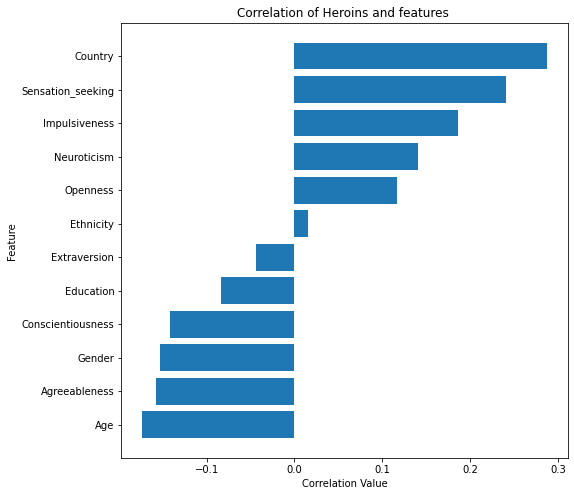

In [20]:
#plot correlation on heroins

plt.figure(figsize=(8,8)) 
plt.barh(list(map(lambda x: x[0],corr_heroins_dict_sorted)), list(map(lambda x: x[1],corr_heroins_dict_sorted))) 
plt.xlabel('Correlation Value') 
plt.ylabel('Feature') 
plt.title('Correlation of Heroins and features ')

Text(0.5, 1.0, 'Correlation of Ecstasies and features ')

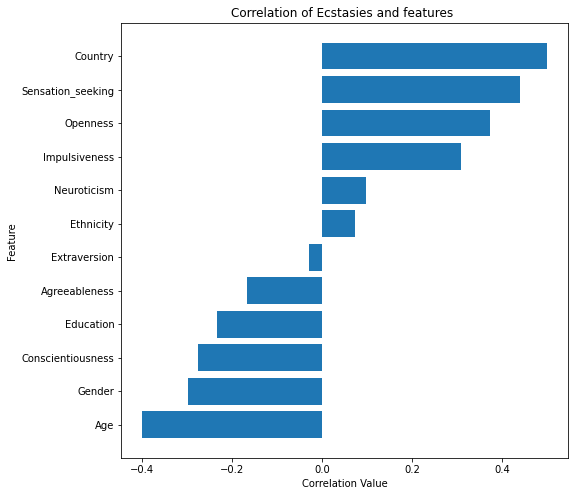

In [21]:
#plot correlation on ecstasies

plt.figure(figsize=(8,8)) 
plt.barh(list(map(lambda x: x[0],corr_ecstasies_dict_sorted)), list(map(lambda x: x[1],corr_ecstasies_dict_sorted))) 
plt.xlabel('Correlation Value') 
plt.ylabel('Feature') 
plt.title('Correlation of Ecstasies and features ')

Text(0.5, 1.0, 'Correlation of Benzos and features ')

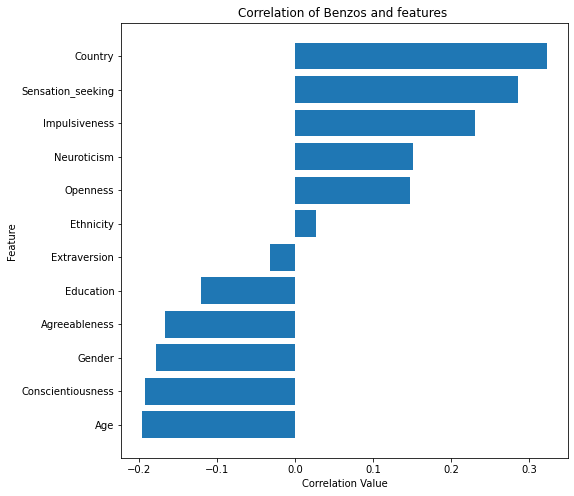

In [22]:
#plot correlation on heroins

plt.figure(figsize=(8,8)) 
plt.barh(list(map(lambda x: x[0],corr_benzos_dict_sorted)), list(map(lambda x: x[1],corr_benzos_dict_sorted))) 
plt.xlabel('Correlation Value') 
plt.ylabel('Feature') 
plt.title('Correlation of Benzos and features ')

#### From above three correlations graph, we can see that ethnicity and country have least correlations with all three target values. 
#### Plus, after a overview of the dataset, most respodents are white, and they come from Amercia or UK. Therefore, we decided to remove country and ethnicity features from the datasets

In [23]:
del data['Country']
del data['Ethnicity']

### Final Cleaned Data

In [24]:
data.head(10)

,Age,Gender,Education,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Heroins,Ecstasies,Benzodiazepines
ID,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0
2,1.00000,-0.48246,8.00000,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,1,0
3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0
4,-0.95197,0.48246,7.00000,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0
5,0.49788,0.48246,8.00000,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0
6,5.00000,0.48246,3.00000,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0
7,3.00000,-0.48246,7.00000,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,0,0,0
8,0.49788,-0.48246,1.00000,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,0,0,0
9,0.49788,0.48246,-0.05921,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,0,0,0


### Preparing for Training

In [25]:
#Split the data again to make sure there is no loss

data1 = data.drop(['Ecstasies', 'Benzodiazepines'], axis = 1)
data2 = data.drop(['Heroins', 'Benzodiazepines'], axis = 1)
data3 = data.drop(['Ecstasies', 'Heroins'], axis = 1)

In [26]:
#split the data into features and target 
y1 = data1['Heroins']
X1 = data1.drop(['Heroins'], axis = 1)

y2 = data2['Ecstasies']
X2 = data2.drop(['Ecstasies'], axis = 1)

y3 = data3['Benzodiazepines']
X3 = data3.drop(['Benzodiazepines'], axis = 1)

In [27]:
from sklearn.model_selection import train_test_split
# spliting the data focusing heroins into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = 42)


# spliting the data focusing ecstasies into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8, random_state = 42)


# spliting the data focusing benzos into train and test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size = 0.8, random_state = 42)


# Logistic Regression
## Firstly, we used logistic regression to build and train our models.
## Heroins

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import metrics

In [29]:
from sklearn.model_selection import GridSearchCV

#create parameter grid preparing for grid search 
param_grid = [
    
    {
     'penalty' : ['l1', 'l2'],
    'C' : [10**i for i in range(-20,7)],
    'solver' : ['liblinear'],
     'class_weight': ['balanced']
    },
    
]

#find the best parameters by using Grid Search and cross validation 
scv = StratifiedKFold(n_splits=5)
heroin_GSCV = GridSearchCV(LogisticRegression(), param_grid = param_grid, scoring = 'accuracy', cv = scv, verbose=True, n_jobs=-1)
best_heroin_clf = heroin_GSCV.fit(X1_train, y1_train)
best_heroin_clf

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14,
                                1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07,
                                1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                100, 1000, 10000, 100000, 1000000],
                          'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}],
             scoring='accuracy', verbose=True)

In [30]:
#return the best parameters
best_heroin_clf.best_params_

{'C': 1e-20,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [31]:
#print the accuracy score of test set and train set based on the best parameters
y1_pred_test = best_heroin_clf.best_estimator_.predict(X1_test)
print("Test Score: ",metrics.accuracy_score(y1_test, y1_pred_test))
y1_pred_train = best_heroin_clf.best_estimator_.predict(X1_train)
print("Train Score: ",metrics.accuracy_score(y1_train, y1_pred_train))

Test Score:  0.8514588859416445
Train Score:  0.8322281167108754


## Ecstasies

In [32]:
ecstasy_GSCV = GridSearchCV(LogisticRegression(), param_grid = param_grid, scoring = 'accuracy', cv = scv, verbose=True, n_jobs=-1)
best_ecstasy_clf = ecstasy_GSCV.fit(X2_train, y2_train)
best_ecstasy_clf

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14,
                                1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07,
                                1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                100, 1000, 10000, 100000, 1000000],
                          'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}],
             scoring='accuracy', verbose=True)

In [33]:
best_ecstasy_clf.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [34]:
y2_pred_test = best_ecstasy_clf.best_estimator_.predict(X2_test)
print("Test Score: ",metrics.accuracy_score(y2_test, y2_pred_test))

y2_pred_train = best_ecstasy_clf.best_estimator_.predict(X2_train)
print("Train Score: ",metrics.accuracy_score(y2_train, y2_pred_train))

Test Score:  0.7771883289124668
Train Score:  0.7771883289124668


## Benzos

In [35]:
benzo_GSCV = GridSearchCV(LogisticRegression(), param_grid = param_grid, scoring = 'accuracy', cv = scv, verbose=True, n_jobs=-1)
best_benzo_clf = benzo_GSCV.fit(X3_train, y3_train)
best_benzo_clf

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14,
                                1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07,
                                1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                100, 1000, 10000, 100000, 1000000],
                          'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}],
             scoring='accuracy', verbose=True)

In [36]:
best_benzo_clf.best_params_

{'C': 1e-20,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [37]:
y3_pred_test = best_benzo_clf.best_estimator_.predict(X3_test)
print("Test Score: ",metrics.accuracy_score(y3_test, y3_pred_test))

y3_pred_train = best_benzo_clf.best_estimator_.predict(X3_train)
print("Train Score: ",metrics.accuracy_score(y3_train, y3_pred_train))

Test Score:  0.8116710875331565
Train Score:  0.7672413793103449


# Support Vector Machine 
## Heroins

In [38]:
from sklearn.svm import SVC

# Create param grid.
param_grid = [
    
    {
     'kernel':['linear','rbf'],
    'C' : [0,0.5,1,10],
        'random_state': [0]
    },
    
]

# Finding the best parameters by using Grid Search and cross validation 
scv = StratifiedKFold(n_splits=5)
heroin_GSCV = GridSearchCV(SVC(), param_grid = param_grid, scoring = 'accuracy', cv = scv, verbose=True, n_jobs=-1)
best_heroin_clf = heroin_GSCV.fit(X1_train, y1_train)
best_heroin_clf

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  40 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0, 0.5, 1, 10], 'kernel': ['linear', 'rbf'],
                          'random_state': [0]}],
             scoring='accuracy', verbose=True)

In [39]:
best_heroin_clf.best_params_

{'C': 0.5, 'kernel': 'linear', 'random_state': 0}

In [40]:
y1_pred_test = best_heroin_clf.best_estimator_.predict(X1_test)
print("Test Score: ",metrics.accuracy_score(y1_test, y1_pred_test))
y1_pred_train = best_heroin_clf.best_estimator_.predict(X1_train)
print("Train Score: ",metrics.accuracy_score(y1_train, y1_pred_train))

Test Score:  0.8514588859416445
Train Score:  0.8322281167108754


## Ecstasies

In [41]:
ecstasy_GSCV = GridSearchCV(SVC(), param_grid = param_grid, scoring = 'accuracy', cv = scv, verbose=True, n_jobs=-1)
best_ecstasy_clf = ecstasy_GSCV.fit(X2_train, y2_train)
best_ecstasy_clf

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0, 0.5, 1, 10], 'kernel': ['linear', 'rbf'],
                          'random_state': [0]}],
             scoring='accuracy', verbose=True)

In [42]:
best_ecstasy_clf.best_params_

{'C': 0.5, 'kernel': 'linear', 'random_state': 0}

In [43]:
y2_pred_test = best_ecstasy_clf.best_estimator_.predict(X2_test)
print("Test Score: ",metrics.accuracy_score(y2_test, y2_pred_test))

y2_pred_train = best_ecstasy_clf.best_estimator_.predict(X2_train)
print("Train Score: ",metrics.accuracy_score(y2_train, y2_pred_train))

Test Score:  0.7904509283819628
Train Score:  0.7738726790450928


## Benzo

In [44]:
benzo_GSCV = GridSearchCV(SVC(), param_grid = param_grid, scoring = 'accuracy', cv = scv, verbose=True, n_jobs=-1)
best_benzo_clf = benzo_GSCV.fit(X3_train, y3_train)
best_benzo_clf

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0, 0.5, 1, 10], 'kernel': ['linear', 'rbf'],
                          'random_state': [0]}],
             scoring='accuracy', verbose=True)

In [45]:
best_benzo_clf.best_params_

{'C': 0.5, 'kernel': 'linear', 'random_state': 0}

In [46]:
y3_pred_test = best_benzo_clf.best_estimator_.predict(X3_test)
print("Test Score: ",metrics.accuracy_score(y3_test, y3_pred_test))

y3_pred_train = best_benzo_clf.best_estimator_.predict(X3_train)
print("Train Score: ",metrics.accuracy_score(y3_train, y3_pred_train))

Test Score:  0.8116710875331565
Train Score:  0.7672413793103449


# Neural Network
## Using PyTorch, we implemented the FeedForword Neural Network 


In [47]:
from torch import nn
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset

In [48]:
#set up parameters
learning_rate = 0.001
epochs = 40
batch_size = 60

# load training and testing data for Heroins
trainset1 = dataset(X1_train.to_numpy(), y1_train.to_numpy())
trainloader1 = DataLoader(trainset1,batch_size=batch_size,shuffle=True)

testset1 = dataset(X1_test.to_numpy(), y1_test.to_numpy())
testloader1 = DataLoader(testset1, batch_size=batch_size, shuffle=True)

# load training and testing data for Ecstasies
trainset2 = dataset(X2_train.to_numpy(), y2_train.to_numpy())
trainloader2 = DataLoader(trainset2,batch_size=batch_size,shuffle=True)

testset2 = dataset(X2_test.to_numpy(), y2_test.to_numpy())
testloader2 = DataLoader(testset2, batch_size=batch_size, shuffle=True)

# load training and testing data for Benzos
trainset3 = dataset(X3_train.to_numpy(), y3_train.to_numpy())
trainloader3 = DataLoader(trainset3,batch_size=batch_size,shuffle=True)

testset3 = dataset(X3_test.to_numpy(), y3_test.to_numpy())
testloader3 = DataLoader(testset3, batch_size=batch_size, shuffle=True)


# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [49]:
# Build a configurable feed-forward network
def feedforward_NN(num_input, num_output, num_layer, num_neuron, activation):
    """A function emcompassing a customizable Pytorch NN
    
     `Note: The activation function for output layer is always sigmoid function` 

        - num_input: The amount of input layers, usually the num of feature.
        - num_output: The amount of output layers, usually 1 for binary classification
        - num_layer: The amount of hidden layers.
        - num_neuron: The amount of neuron in each hidden layer
        - activation: The activation function to be used in every hidden layer 
    """
    if num_layer == 1:
        if activation == 'sigmoid':
            model = nn.Sequential(nn.Linear(num_input, num_neuron),
                                nn.Sigmoid(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.Sigmoid(),
                                nn.Linear(num_neuron, num_output),
                                nn.Sigmoid())
        elif activation == 'tanh':
            model = nn.Sequential(nn.Linear(num_input, num_neuron),
                                nn.Tanh(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.Tanh(),
                                nn.Linear(num_neuron, num_output),
                                nn.Sigmoid())
        elif activation == 'identity':
            model = nn.Sequential(nn.Linear(num_input, num_neuron),
                                nn.Identity(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.Identity(),
                                nn.Linear(num_neuron, num_output),
                                nn.Sigmoid())
        elif activation == 'relu':
            model = nn.Sequential(nn.Linear(num_input, num_neuron),
                                nn.ReLU(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.ReLU(),
                                nn.Linear(num_neuron, num_output),
                                nn.Sigmoid())
        else: raise RuntimeError('activation can only be one of the following: sigmoid, identity, relu, tanh')
    elif num_layer == 2:
        if activation == 'sigmoid':
            model = nn.Sequential(nn.Linear(num_input, num_neuron),
                                nn.Sigmoid(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.Sigmoid(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.Sigmoid(),
                                nn.Linear(num_neuron, num_output),
                                nn.Sigmoid())
        elif activation == 'tanh':
            model = nn.Sequential(nn.Linear(num_input, num_neuron),
                                nn.Tanh(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.Tanh(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.Tanh(),
                                nn.Linear(num_neuron, num_output),
                                nn.Sigmoid())
        elif activation == 'identity':
            model = nn.Sequential(nn.Linear(num_input, num_neuron),
                                nn.Identity(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.Identity(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.Identity(),
                                nn.Linear(num_neuron, num_output),
                                nn.Sigmoid())
        elif activation == 'relu':
            model = nn.Sequential(nn.Linear(num_input, num_neuron),
                                nn.ReLU(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.ReLU(),
                                nn.Linear(num_neuron, num_neuron),
                                nn.ReLU(),
                                nn.Linear(num_neuron, num_output),
                                nn.Sigmoid())
        else: raise RuntimeError('activation can only be one of the following: sigmoid, identity, relu, tanh')
    else: raise RuntimeError('Expected number of layer to be either 1 or 2')

    return model

In [50]:
from statistics import mean
# method to train the model
def train_NN(model, epochs, trainloader, testloader,optimizer, criterion, activation):
  """Method to train NN"""

  def check_test_accuracy(y_test, y_pred) -> float:
    """helper method to determine the test accuracy by comparing test data and predicted data"""
    counter = 0
    for y1, y2 in zip(y_test, y_pred):
      if y2 > 0.5 and y1 == 0:
        counter += 1
      if y2 <= 0.5 and y1 == 1:
        counter += 1
    
    return (len(y_test) - counter) / len(y_pred)

  print(f"Current setting: activation function for hidden layer:{activation}, activation function for output layer: Sigmoid.")
  

  train_losses = []
  test_errors = []
  train_accu = []
  test_accu = []
  
  # Train data
  # forward loop
  for epoch in range(epochs):
    # train data
    print(f"----------Epoch {epoch + 1}----------")
    running_loss = 0.0
    for x_train, y_train in trainloader:
      # Training pass
      optimizer.zero_grad()
      output = model(x_train)
      loss = criterion(output, y_train.reshape(-1,1))
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    else:
      print(f"Training loss: {running_loss/len(trainloader)}")

    #test data
    with torch.no_grad():
      for x_test, y_test in testloader:
        output2 = model(x_test)
    

    # display training error
    Training_accuracy = check_test_accuracy(y_train, output)
    # displaing testing error
    Testing_accuracy = check_test_accuracy(y_test, output2)
    print(f"Training error is {(1-Training_accuracy)*100}%")
    print(f"Testing error is {(1-Testing_accuracy)*100}%")
    train_losses.append(running_loss/len(trainloader))
    test_errors.append(1-Testing_accuracy)
    train_accu.append(Training_accuracy)
    test_accu.append(Testing_accuracy)
    
    
  plt.figure(figsize=(8,8))  
  plt.plot(np.linspace(1,40,num=40),train_losses)
  plt.xlabel("Epoch")
  plt.ylabel("Training Loss(%)")
  plt.show()


  plt.figure(figsize=(8,8))
  plt.plot(np.linspace(1,40,num=40),test_errors)
  plt.xlabel("Epoch")
  plt.ylabel("Testing Error(%)")
  plt.show()
  
  #since the training accuracy and testing accuracy are waving all the time after epoches, we used 
  #mean value to compute its overall performance
  print("mean training accuracy:", mean(train_accu), "  mean testing accuracy:",mean(test_accu))

  

        

## Heroins

Current setting: activation function for hidden layer:relu, activation function for output layer: Sigmoid.
----------Epoch 1----------
Training loss: 0.6240191299181718
Training error is 12.5%
Testing error is 5.882352941176472%
----------Epoch 2----------
Training loss: 0.5310570586186188
Training error is 12.5%
Testing error is 23.529411764705888%
----------Epoch 3----------
Training loss: 0.44521200828827345
Training error is 0.0%
Testing error is 23.529411764705888%
----------Epoch 4----------
Training loss: 0.4192887246608734
Training error is 0.0%
Testing error is 11.764705882352944%
----------Epoch 5----------
Training loss: 0.4226384816261438
Training error is 37.5%
Testing error is 11.764705882352944%
----------Epoch 6----------
Training loss: 0.4113199355510565
Training error is 12.5%
Testing error is 5.882352941176472%
----------Epoch 7----------
Training loss: 0.41206544866928685
Training error is 25.0%
Testing error is 23.529411764705888%
----------Epoch 8----------
Traini

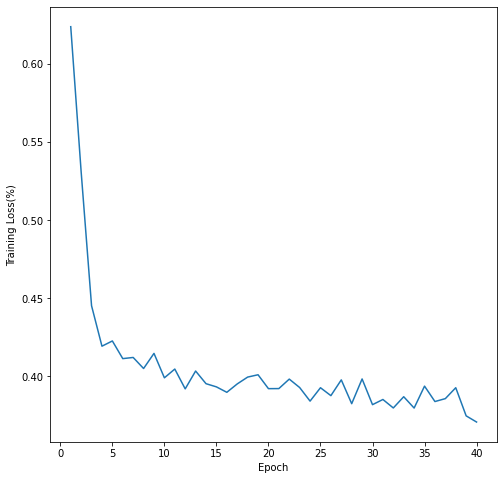

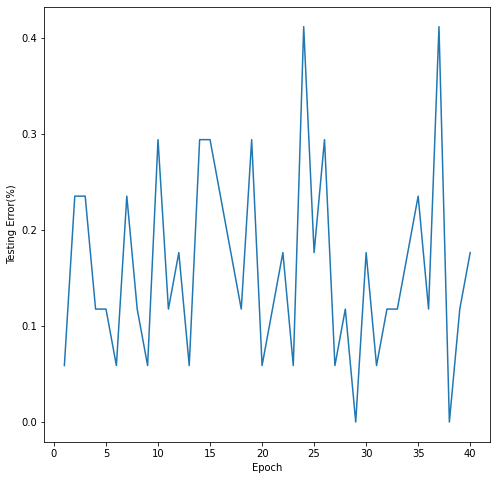

mean training accuracy: 0.840625   mean testing accuracy: 0.8382352941176471


In [51]:
#build the NN 
model = feedforward_NN(num_input=10, num_output=1, num_layer=2, num_neuron=20, activation='relu')

#set up iptimizer and loss function
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
criterion = torch.nn.BCELoss()

#train the model for predicing Heroins, print the result in each epoch and draw the
#trend of training loss and testing error as epoch goes
trained_model1 = train_NN(model, epochs, trainloader1, testloader1,optimizer, criterion, activation="relu")

## Ecstasies

Current setting: activation function for hidden layer:relu, activation function for output layer: Sigmoid.
----------Epoch 1----------
Training loss: 0.66059698508336
Training error is 12.5%
Testing error is 17.647058823529417%
----------Epoch 2----------
Training loss: 0.48867535361876857
Training error is 37.5%
Testing error is 41.17647058823529%
----------Epoch 3----------
Training loss: 0.46055310047589815
Training error is 0.0%
Testing error is 17.647058823529417%
----------Epoch 4----------
Training loss: 0.4551313840425931
Training error is 12.5%
Testing error is 17.647058823529417%
----------Epoch 5----------
Training loss: 0.447711325608767
Training error is 12.5%
Testing error is 17.647058823529417%
----------Epoch 6----------
Training loss: 0.4372908186454039
Training error is 12.5%
Testing error is 17.647058823529417%
----------Epoch 7----------
Training loss: 0.4302366307148567
Training error is 0.0%
Testing error is 11.764705882352944%
----------Epoch 8----------
Training

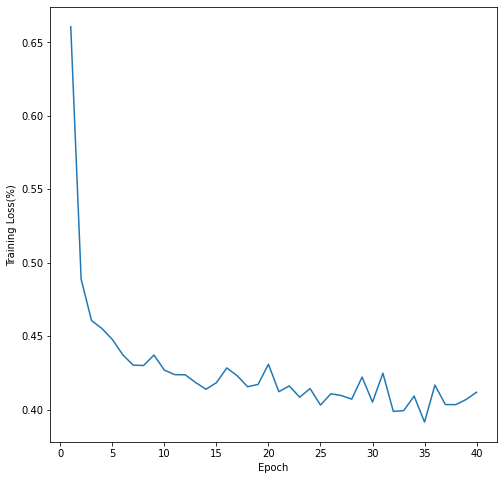

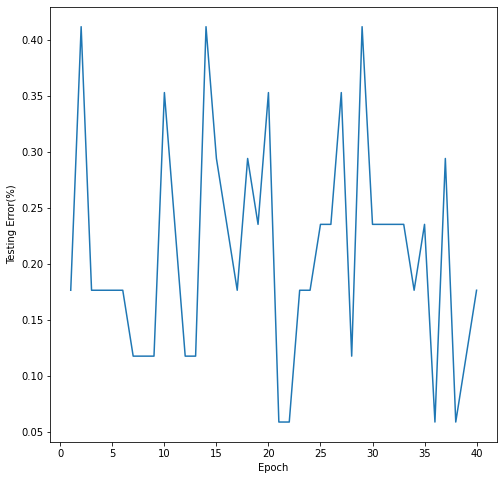

mean training accuracy: 0.8   mean testing accuracy: 0.7911764705882353


In [52]:
trained_model2 = train_NN(model, epochs, trainloader2, testloader2,optimizer, criterion, activation="relu")

## Benzos

Current setting: activation function for hidden layer:relu, activation function for output layer: Sigmoid.
----------Epoch 1----------
Training loss: 0.5775887129398493
Training error is 12.5%
Testing error is 5.882352941176472%
----------Epoch 2----------
Training loss: 0.46533477764863235
Training error is 25.0%
Testing error is 23.529411764705888%
----------Epoch 3----------
Training loss: 0.4677568536538344
Training error is 12.5%
Testing error is 5.882352941176472%
----------Epoch 4----------
Training loss: 0.46371163657078374
Training error is 25.0%
Testing error is 17.647058823529417%
----------Epoch 5----------
Training loss: 0.44430376360049617
Training error is 12.5%
Testing error is 11.764705882352944%
----------Epoch 6----------
Training loss: 0.45090752381544846
Training error is 25.0%
Testing error is 23.529411764705888%
----------Epoch 7----------
Training loss: 0.43852417858747333
Training error is 0.0%
Testing error is 17.647058823529417%
----------Epoch 8----------
Tr

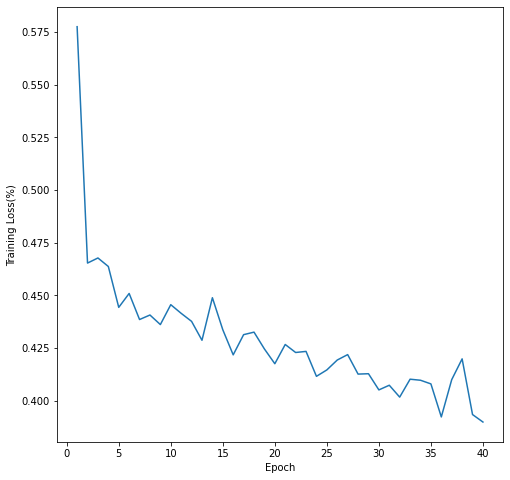

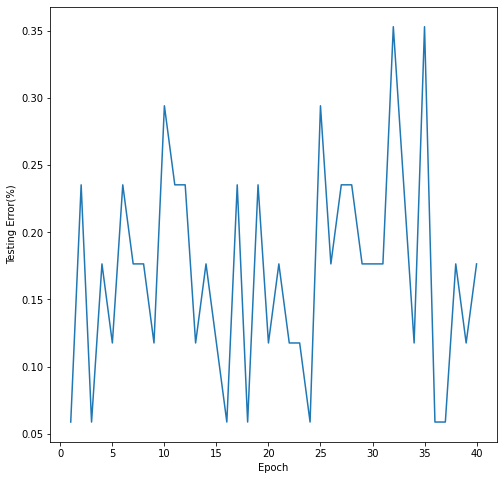

mean training accuracy: 0.815625   mean testing accuracy: 0.8294117647058823


In [53]:
trained_model3 = train_NN(model, epochs, trainloader3, testloader3,optimizer, criterion, activation="relu")

# Analysis 

## Within each modeling apporach 
### Logistic Regression

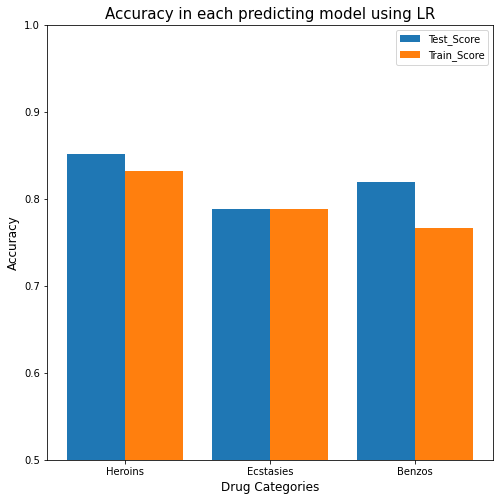

In [54]:
#x-axis: each drug category 
x = ['Heroins', 'Ecstasies', 'Benzos']
#the accuracy scores generate from above
Test_scores = [0.8514588859416445,0.7877984084880637,0.8196286472148541]
Train_scores = [0.8322281167108754,0.7877984084880637,0.76657824933687]

X_axis = np.arange(len(x))

#plot the bar 
plt.bar(X_axis - 0.2, Test_scores, 0.4, label = 'Test_Score')
plt.bar(X_axis + 0.2, Train_scores, 0.4, label = 'Train_Score')


plt.xticks(X_axis, x)

#set limit to the y-axis
plt.ylim(0.5,1)

#label x and y 
plt.xlabel("Drug Categories",fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)

#add title 
plt.title("Accuracy in each predicting model using LR", fontsize = 15)

#plot the legend
plt.legend()

#set the size of the figure
plt.gcf().set_size_inches(8, 8)



## Support Vector Machine 

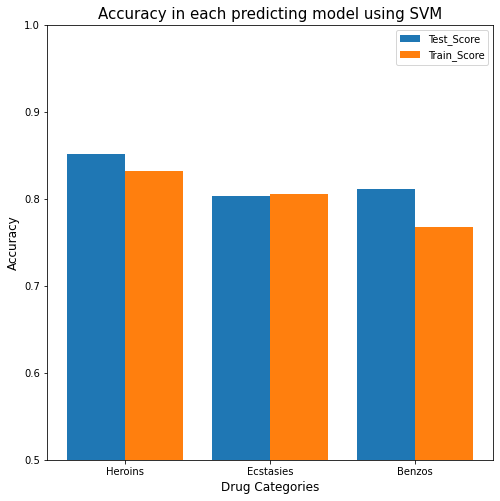

In [55]:
x = ['Heroins', 'Ecstasies', 'Benzos']
    
Test_scores = [0.8514588859416445,0.8037135278514589,0.8116710875331565]
Train_scores = [0.8322281167108754,0.8050397877984085,0.7672413793103449]

X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, Test_scores, 0.4, label = 'Test_Score')
plt.bar(X_axis + 0.2, Train_scores, 0.4, label = 'Train_Score')

plt.xticks(X_axis, x)
plt.ylim(0.5,1)
plt.xlabel("Drug Categories",fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.title("Accuracy in each predicting model using SVM", fontsize = 15)
plt.legend()
plt.gcf().set_size_inches(8, 8)

## Neural Network

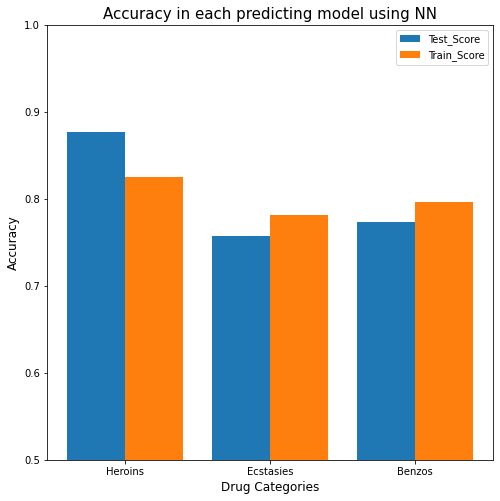

In [56]:
x = ['Heroins', 'Ecstasies', 'Benzos']
    
Test_scores = [0.8764705882352941,0.7573529411764706,0.7735294117647059]
Train_scores = [0.825 ,0.78125,0.796875]

X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, Test_scores, 0.4, label = 'Test_Score')
plt.bar(X_axis + 0.2, Train_scores, 0.4, label = 'Train_Score')

plt.xticks(X_axis, x)
plt.ylim(0.5,1)
plt.xlabel("Drug Categories",fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.title("Accuracy in each predicting model using NN", fontsize = 15)
plt.legend()
plt.gcf().set_size_inches(8, 8)

## Across each drug category

### Heroins

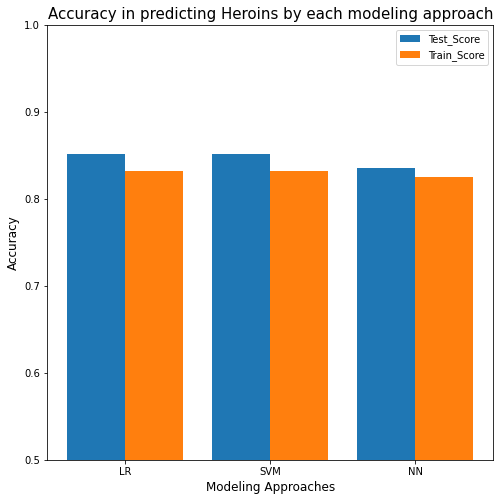

In [57]:
x = ['LR', 'SVM', 'NN']
    
Test_scores = [0.8514588859416445,0.8514588859416445,0.8352941176470587]
Train_scores = [0.8322281167108754 ,0.8322281167108754,0.825 ]

X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, Test_scores, 0.4, label = 'Test_Score')
plt.bar(X_axis + 0.2, Train_scores, 0.4, label = 'Train_Score')

plt.xticks(X_axis, x)
plt.ylim(0.5,1)
plt.xlabel("Modeling Approaches",fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.title("Accuracy in predicting Heroins by each modeling approach", fontsize = 15)
plt.legend()
plt.gcf().set_size_inches(8, 8)

### Ecstasies 

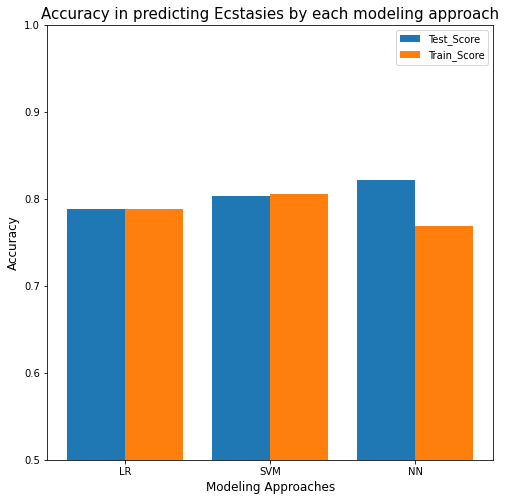

In [58]:
x = ['LR', 'SVM', 'NN']
    
Test_scores = [0.7877984084880637,0.8037135278514589,0.8220588235294117]
Train_scores = [0.7877984084880637 ,0.8050397877984085,0.76875 ]

X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, Test_scores, 0.4, label = 'Test_Score')
plt.bar(X_axis + 0.2, Train_scores, 0.4, label = 'Train_Score')

plt.xticks(X_axis, x)
plt.ylim(0.5,1)
plt.xlabel("Modeling Approaches",fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.title("Accuracy in predicting Ecstasies by each modeling approach", fontsize = 15)
plt.legend()
plt.gcf().set_size_inches(8, 8)

### Neural Network

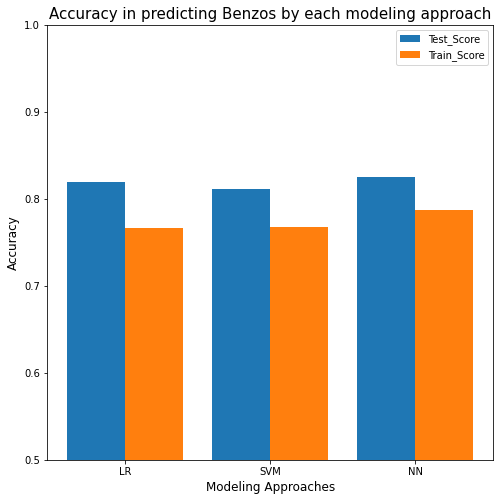

In [59]:
x = ['LR', 'SVM', 'NN']
    
Test_scores = [0.8196286472148541,0.8116710875331565,0.825]
Train_scores = [ 0.76657824933687 ,0.7672413793103449,0.7875 ]

X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, Test_scores, 0.4, label = 'Test_Score')
plt.bar(X_axis + 0.2, Train_scores, 0.4, label = 'Train_Score')

plt.xticks(X_axis, x)
plt.ylim(0.5,1)
plt.xlabel("Modeling Approaches",fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.title("Accuracy in predicting Benzos by each modeling approach", fontsize = 15)
plt.legend()
plt.gcf().set_size_inches(8, 8)